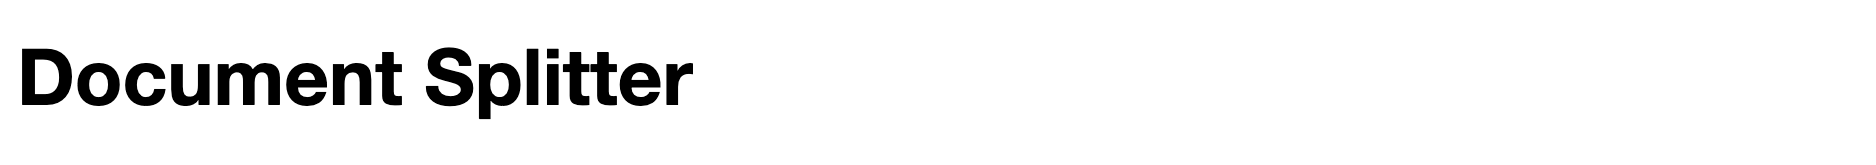

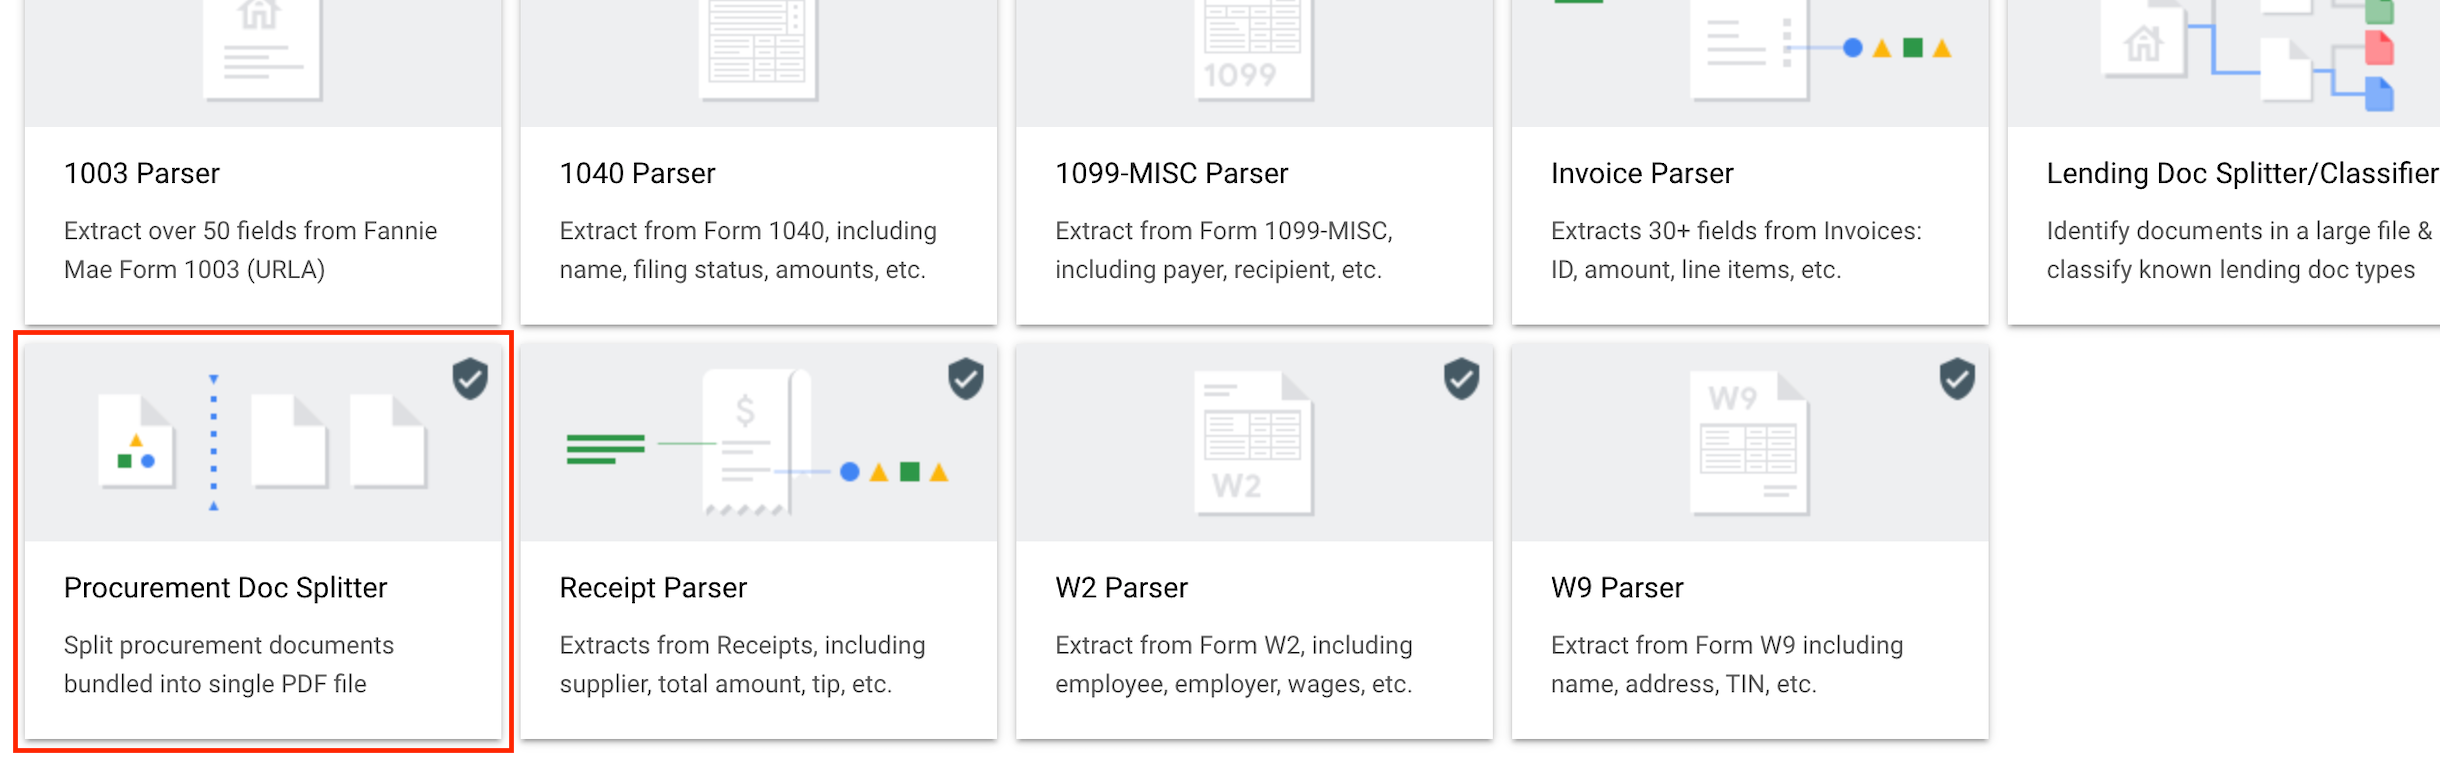

### 1. Download Multi-Page PDF

In [24]:
!gsutil cp gs://cloud-samples-data/documentai/multi-document.pdf .

Copying gs://cloud-samples-data/documentai/multi-document.pdf...
/ [1 files][729.5 KiB/729.5 KiB]                                                
Operation completed over 1 objects/729.5 KiB.                                    


In [41]:
MULTI_DOC = 'multi-document.pdf'

### 2. Count Pages

In [71]:
img = Image(filename=MULTI_DOC)
n_pages = len(img.sequence)
n_pages

3

### 3. Call Document Splitter

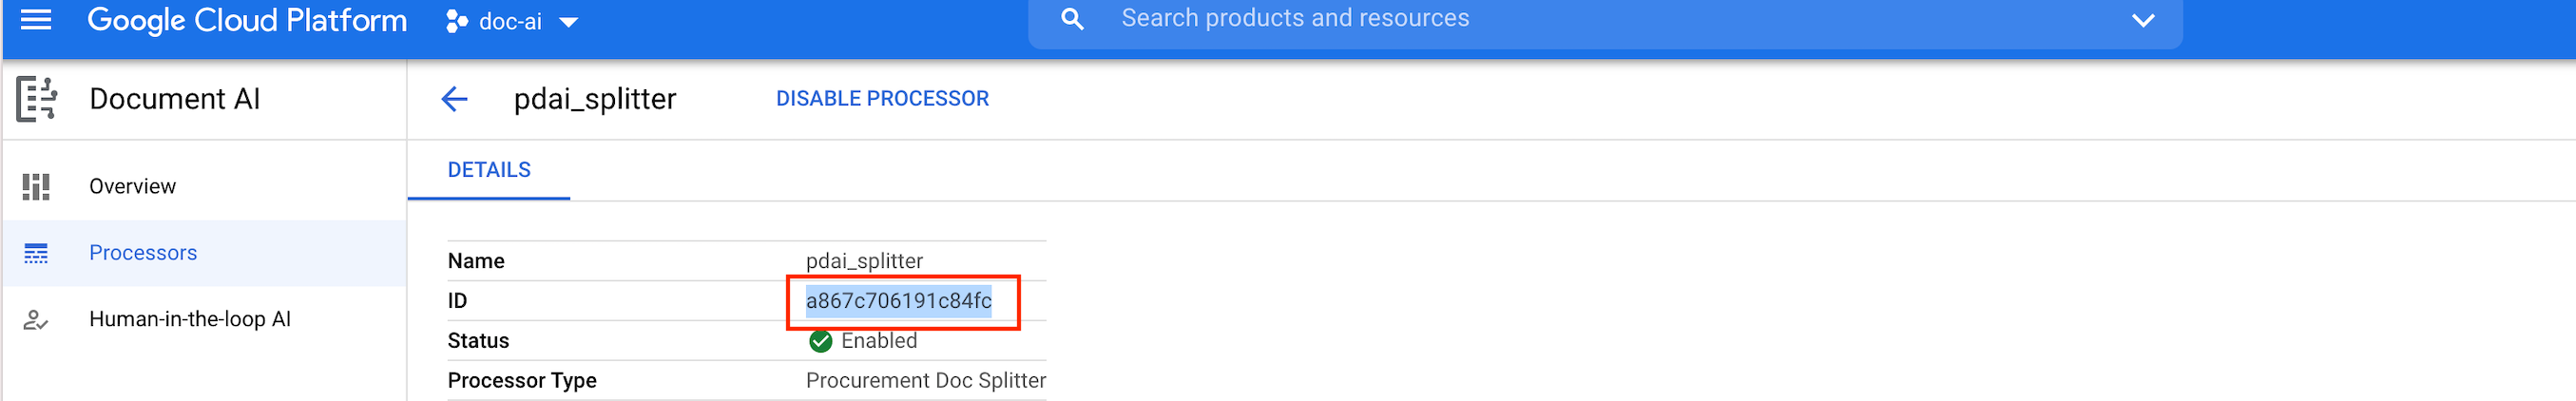

In [55]:
PROCESSOR_ID = 'a867c706191c84fc'

# Document AI URI
name = f"projects/{PROJECT_ID}/locations/{LOCATION}/processors/{PROCESSOR_ID}"

with open(MULTI_DOC, "rb") as image:    
    # Request parameters with PDF file
    document = {"content": image.read(), "mime_type": "application/pdf"}
    request = {"name": name, "document": document}

# call Document AI
results = documentai.DocumentProcessorServiceClient().process_document(request=request)

### 4. Verify Page Count

In [72]:
assert n_pages == len(results.document.entities)

### 5. Get 3rd Page

In [79]:
results.document.entities[2]

text_anchor {
  text_segments {
    start_index: 1649
    end_index: 2084
  }
}
confidence: 0.9952753782272339
page_anchor {
  page_refs {
    page: 2
  }
}

In [ ]:
[[entity.type_, entity.mention_text, round(entity.confidence, 4)] for entity in results.document.entities]

In [99]:
print(results.document.text[results.document.entities[2].text_anchor.text_segments[0].start_index:results.document.entities[2].text_anchor.text_segments[0].end_index])

Invoice
DATE: 01/01/1970
INVOICE: NO. 001
FROM: Company ABC
user@companyabc.com
TO: John Doe
johndoe@email.com
ADDRESS: 111 Main Street
Anytown, USA
ADDRESS: 222 Main Street
Anytown, USA
TERMS: 6 month contract
DUE: 01/01/2025
Item Description
Quantity
Price
Amount
Tool A
500
$1.00
$500.00
Service B
1
$900.00
$900.00
Resource C
50
$12.00
$600.00
Subtotal
$2000.00
Tax
$140.00
BALANCE DUE
$2140.00
NOTES:
Supplies used for Project Q.



In [98]:
def print_pages_split(text: str, document: dict):
    """
    Document AI identifies possible page splits
    in document. This function converts page splits
    to text snippets and prints it.    
    """
    for i, entity in enumerate(document.entities):
        confidence = entity.confidence
        text_entity = ''
        for segment in entity.text_anchor.text_segments:
            start = segment.start_index
            end = segment.end_index
            text_entity += text[start:end]
        pages = [p.page for p in entity.page_anchor.page_refs]
        print(f"*** Entity number: {i}, Split Confidence: {confidence} ***")
        print(f"*** Pages numbers: {[p for p in pages]} ***\nText snippet: {text_entity[:100]}")
        print()
print_pages_split(results.document.text, results.document)

*** Entity number: 0, Split Confidence: 0.5363052487373352 ***
*** Pages numbers: [0] ***
Text snippet: FakeDoc M.D.
HEALTH INTAKE FORM
Please fill out the questionnaire carefully. The information you pro

*** Entity number: 1, Split Confidence: 0.7433328628540039 ***
*** Pages numbers: [1] ***
Text snippet: Loan Agreement Form
Agreement Number: 0123456789
Agreement date:
01/01/2020
This loan agreement is c

*** Entity number: 2, Split Confidence: 0.9952753782272339 ***
*** Pages numbers: [2] ***
Text snippet: Invoice
DATE: 01/01/1970
INVOICE: NO. 001
FROM: Company ABC
user@companyabc.com
TO: John Doe
johndoe

